<a href="https://colab.research.google.com/github/TatyanaFilimonova/DataScience/blob/main/Module4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**Класифікація** - це тип завдань машинного навчання, де мета полягає у віднесенні об'єктів до певних категорій (класів) на основі наявних даних.

**Приклади:**
- Розпізнавання образів: визначення, чи є на фотографії кіт чи собака.
- Виявлення спаму: класифікація листів як "спам" або "не спам".
- Медична діагностика: визначення наявності чи відсутності хвороби на основі аналізів.

**Відмінність від регресії:** На відміну від регресії, де ми передбачаємо неперервне значення (ціна на акції, температура), у класифікації ми маємо справу з дискретними категоріями.

## Data

**Приклад**: Вступ на бюджет.

**Дано:** Дані про абітурієнтів, які складали два вступні іспити - англійську мову та фаховий іспит (шкала від 0 до 100). Також ми знаємо, хто з них вступив на бюджет, а хто ні.

In [ ]:
np.random.seed(27)

eng_result = np.random.randint(1, 101, size=100).reshape(-1, 1)
main_result = np.random.randint(1, 101, size=100).reshape(-1, 1)
budget_student = np.array(eng_result + main_result >= 100, dtype=int).reshape(-1, 1)

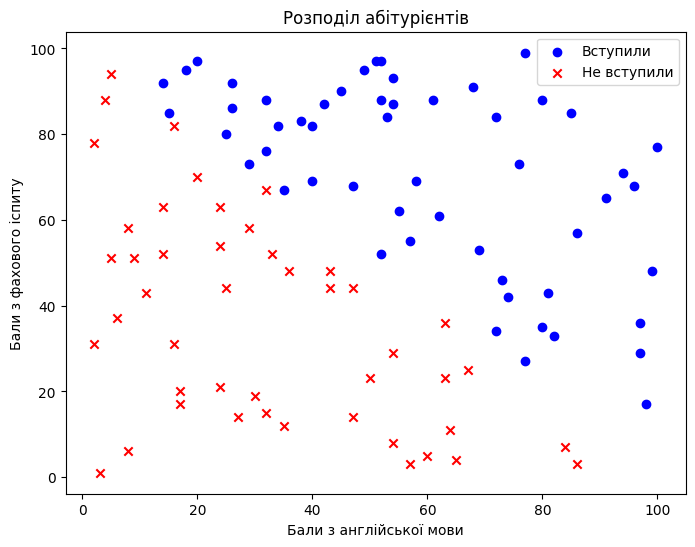

In [ ]:
# Дані абітурієнтів
data = np.hstack((eng_result, main_result, budget_student))

X = data[:, :2]  # Ознаки (бали з іспитів)
y = data[:, 2]  # Цільова змінна (вступ на бюджет: 1 - так, 0 - ні)

plt.figure(figsize=(8, 6))
plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Вступили", marker='o', c='blue')
plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Не вступили", marker='x', c='red')

plt.xlabel("Бали з англійської мови")
plt.ylabel("Бали з фахового іспиту")
plt.title("Розподіл абітурієнтів")
plt.legend()
plt.show()

## Linear Regression

- **Лінійний класифікатор:** Логістична регресія належить до лінійних класифікаторів, тобто вона будує межу рішення у вигляді прямої лінії (або гіперплощини для більшої кількості ознак).
- **Ймовірність:** На відміну від деяких інших методів, логістична регресія не просто каже "так" чи "ні" (вступив чи ні), а передбачає ймовірність приналежності до класу.
- **Сигмоїдна функція:** Щоб отримати ймовірність (значення від 0 до 1), логістична регресія використовує сигмоїдну функцію. Ця функція перетворює будь-яке число в число між 0 та 1.

In [ ]:
# обчислюємо лінійну комбінацію ознак (балів з іспитів) з вагами моделі

def h(X, W):
    new_X = np.insert(X, 0, 1, axis=0)
    return new_X @ W  # w0*1 + w1*x1 + w2*x2

In [ ]:
# результат лінійної комбінації пропускаємо через сигмоїдну функцію, щоб отримати ймовірність

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
sigmoid(2)

0.8807970779778823

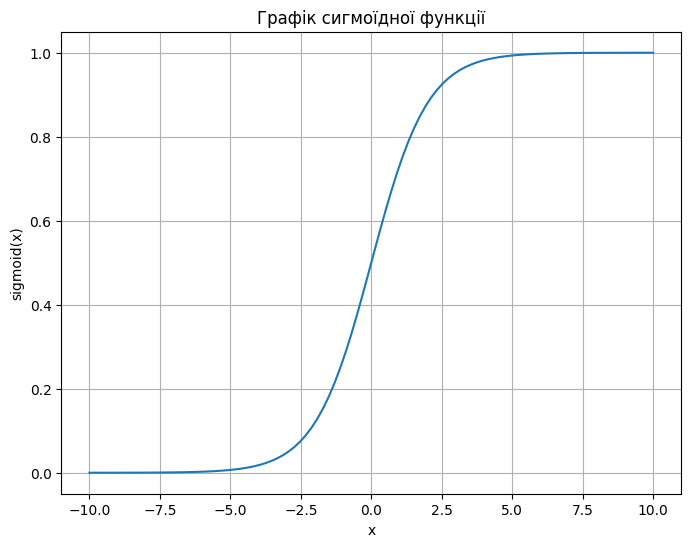

In [ ]:
test_x = np.linspace(-10, 10, 100)
test_y = sigmoid(test_x)

plt.figure(figsize=(8, 6))
plt.plot(test_x, test_y)
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.title("Графік сигмоїдної функції")
plt.grid(True)
plt.show()

In [ ]:
# припустимо, у нас є абітурієнт з балами 75 з англійської та 85 з фахового mі ваги моделі

z = h(np.array([75, 85]), np.array([0.5, -0.2, 0.3]))
probability = sigmoid(z)
print(f"Ймовірність вступу: {probability:.2f}")

Ймовірність вступу: 1.00


### Loss Function

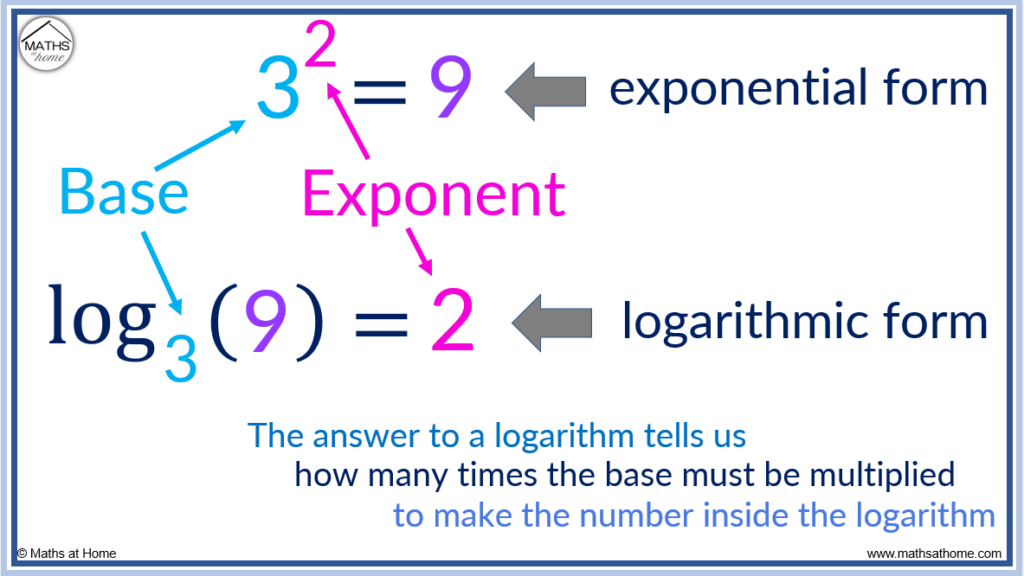

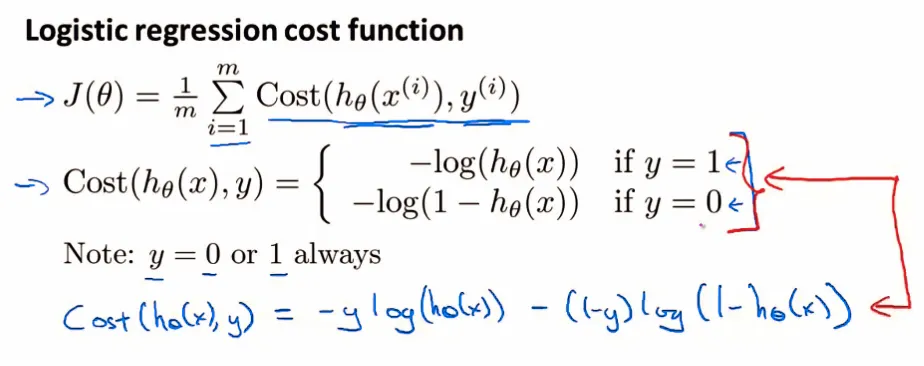

**Оцінка якості:** Нам потрібна міра, яка показує, наскільки добре наша модель передбачає результати.

**Крос-ентропія:** В логістичній регресії часто використовується функція втрат "крос-ентропія". Вона показує, наскільки сильно розходяться наші передбачення з реальними даними. Чим менше значення крос-ентропії, тим краще працює модель.

In [ ]:
def cross_entropy(y_true, y_pred, epsilon=1e-15): # уникнення ділення на 0
    y_pred_fix = np.clip(y_pred, epsilon, 1 - epsilon)
    return -(y_true * np.log(y_pred_fix) + (1 - y_true) * np.log(1 - y_pred_fix)).mean()

In [ ]:
y_true = np.array([1, 0, 1, 0, 1])  # реальні дані - вступ/не вступ
y_pred = np.array([0.0, 0.3, 0.9, 0.2, 0.7])  # передбачені ймовірності

loss = cross_entropy(y_true, y_pred)
print(f"Значення функції втрат: {loss:.2f}")

Значення функції втрат: 7.12


### Gradient Descent

#### Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

# norm_X = X.copy()
# norm_X[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
# norm_X[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

scaler = StandardScaler()
norm_X = scaler.fit_transform(X)

### Training

In [ ]:
def gradient_descent(X, y, weights, learning_rate=0.1, epochs=1000):
    costs = []
    n_samples = X.shape[0]

    # додаємо стовпець з одиницями до X
    X = np.concatenate((np.ones((n_samples, 1)), X), axis=1)

    for _ in range(epochs):
        z = np.dot(X, weights)
        y_predicted = sigmoid(z)
        costs.append(cross_entropy(y, y_predicted))

        dw = (1 / n_samples) * np.dot(X.T, y_predicted - y)
        weights -= learning_rate * dw

    return weights, costs


# Ініціалізація вагів
initial_weights = np.array([0.0, 0.0, 0.0])

# Навчання моделі
trained_weights, costs = gradient_descent(norm_X, y, initial_weights, learning_rate=0.5, epochs=40000)
print("Навчені ваги:", trained_weights)

Навчені ваги: [ 0.99661579 22.94023078 24.55925678]


In [ ]:
min(costs)

0.023265751781208342

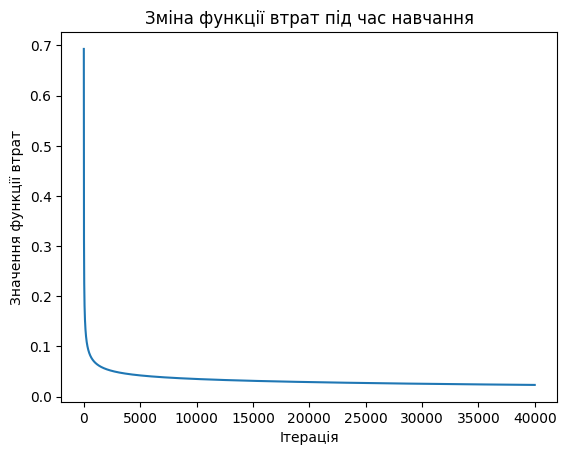

In [ ]:
plt.plot(costs)
plt.xlabel("Ітерація")
plt.ylabel("Значення функції втрат")
plt.title("Зміна функції втрат під час навчання")
plt.show()

#### Границя рішення

Межа рішення - це лінія, де ймовірність приналежності до будь-якого класу дорівнює 0.5. Це відповідає значенню z = 0 (бо сигмоїда від 0 дорівнює 0.5).

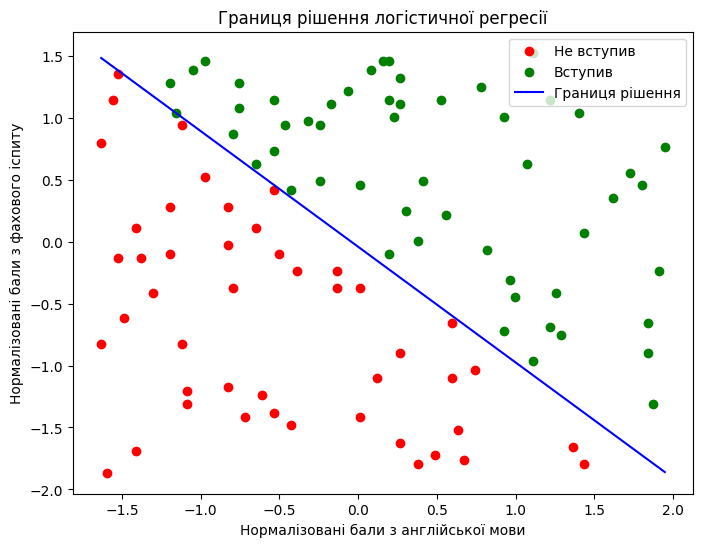

In [ ]:
# графік
plt.figure(figsize=(8, 6))

# точки даних
plt.scatter(norm_X[y == 0][:, 0], norm_X[y == 0][:, 1], label='Не вступив', color='red')
plt.scatter(norm_X[y == 1][:, 0], norm_X[y == 1][:, 1], label='Вступив', color='green')

# границя рішення
# w0 + w1*x1 + w2*x2 = 0
# w2*x2 = - (w0 + w1*x1)
# x2 = - (w0 + w1*x1) / w2
x_values = np.array([np.min(norm_X[:, 0]), np.max(norm_X[:, 0])])
y_values = -(trained_weights[0] + trained_weights[1] * x_values) / trained_weights[2]
plt.plot(x_values, y_values, label='Границя рішення', color='blue')

plt.xlabel("Нормалізовані бали з англійської мови")
plt.ylabel("Нормалізовані бали з фахового іспиту")
plt.legend()
plt.title('Границя рішення логістичної регресії')
plt.show()

In [ ]:
[np.min(norm_X[:, 0]), np.max(norm_X[:, 0])]

[-1.6317040984847775, 1.9480362563732523]

## Реалізація у scikit-learn

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression


X, y = load_iris(return_X_y=True)

clf = LogisticRegression(random_state=0).fit(X, y)
clf.score(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9733333333333334

### Scale data

In [ ]:
iris_scaler = StandardScaler()
norm_X = iris_scaler.fit_transform(X)

clf = LogisticRegression(random_state=0).fit(norm_X, y)
clf.score(norm_X, y)

0.9733333333333334

## Non-linear decision boundary

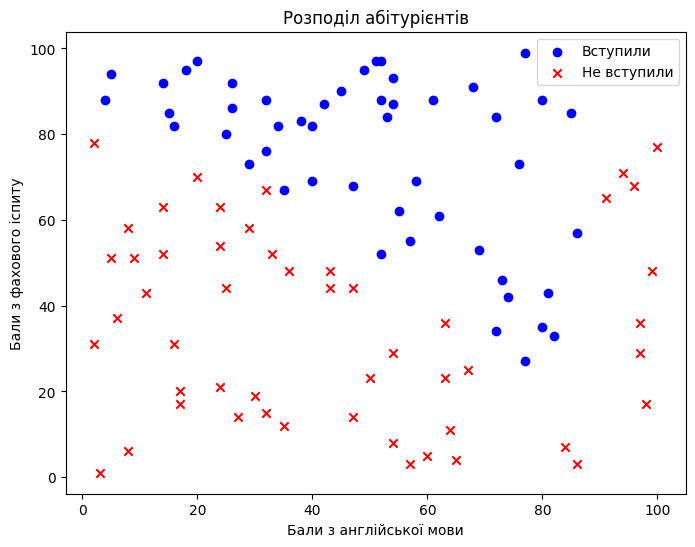

In [ ]:
# Дані абітурієнтів
condition = np.logical_or(eng_result + main_result >= 100, main_result >= 80)
condition = np.logical_and(condition, eng_result < 90)
new_budget_student = np.array(condition, dtype=int).reshape(-1, 1)
new_data = np.hstack((eng_result, main_result, new_budget_student))

X = new_data[:, :2]  # Ознаки (бали з іспитів)
y = new_data[:, 2]  # Цільова змінна (вступ на бюджет: 1 - так, 0 - ні)

plt.figure(figsize=(8, 6))
plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Вступили", marker='o', c='blue')
plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Не вступили", marker='x', c='red')

plt.xlabel("Бали з англійської мови")
plt.ylabel("Бали з фахового іспиту")
plt.title("Розподіл абітурієнтів")
plt.legend()
plt.show()

In [ ]:
scaler = StandardScaler()
norm_X = scaler.fit_transform(X)

### Initialize

In [ ]:
from sklearn.preprocessing import PolynomialFeatures


poly_features = PolynomialFeatures(degree=4, interaction_only=False, include_bias=False)
X_poly = poly_features.fit_transform(norm_X)

# check the extened polynomial features of the first data point
print('Original feature:', norm_X[0])
print('Polynomial features', X_poly[0])

Original feature: [-0.97420077  0.52328502]
Polynomial features [-0.97420077  0.52328502  0.94906714 -0.50978467  0.27382722 -0.92458193
  0.49663262 -0.26676268  0.14328968  0.90072843 -0.48381988  0.25988041
 -0.13959292  0.07498134]


### Fit

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_poly,y)
log_reg.intercept_, log_reg.coef_ # check the bais term and feature weights of the trained model

(array([0.19951587]),
 array([[ 1.92151275,  1.6089351 ,  0.50127602, -0.5524313 ,  0.27065714,
          0.41162697,  0.20945444, -0.49456195,  1.53544333, -1.04371003,
         -0.60184657,  0.4288782 , -0.07655042, -0.00534318]]))

#### Score on the train dataset

In [ ]:
log_reg.score(X_poly, y)

0.98

#### Test

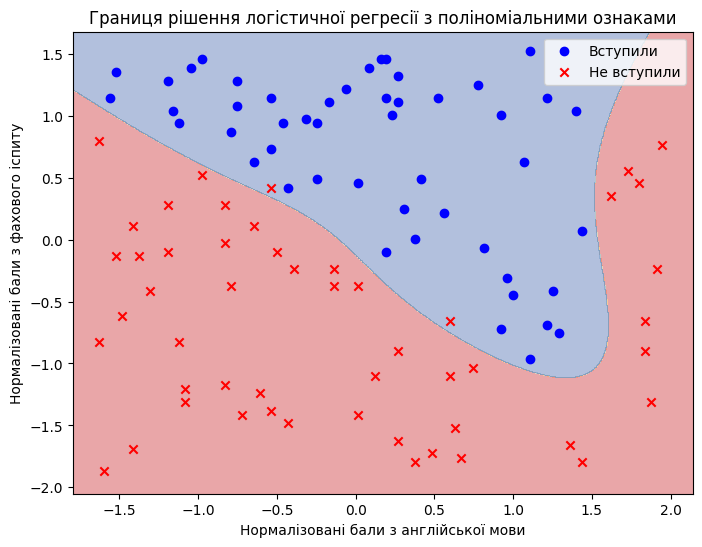

In [ ]:
# cітка точок для візуалізації
discretization = 1000
grid_x = np.linspace(np.min(norm_X[:, 0])*1.1, np.max(norm_X[:, 0])*1.1, discretization)
grid_y = np.linspace(np.min(norm_X[:, 1])*1.1, np.max(norm_X[:, 1])*1.1, discretization)
xx, yy = np.meshgrid(grid_x, grid_y)

# передбачення значень для кожної точки сітки
grid = np.c_[xx.ravel(), yy.ravel()]
grid_poly = poly_features.transform(grid)
Z = log_reg.predict(grid_poly).reshape(xx.shape)

# візуалізація
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.4)
plt.scatter(norm_X[y == 1, 0], norm_X[y == 1, 1], label="Вступили", marker='o', c='blue')
plt.scatter(norm_X[y == 0, 0], norm_X[y == 0, 1], label="Не вступили", marker='x', c='red')

plt.xlabel("Нормалізовані бали з англійської мови")
plt.ylabel("Нормалізовані бали з фахового іспиту")
plt.title("Границя рішення логістичної регресії з поліноміальними ознаками")
plt.legend()
plt.show()

In [ ]:
print(xx.shape, yy.shape)
print(grid.shape)

(1000, 1000) (1000, 1000)
(1000000, 2)


# Мультикласова класифікація

## One-vs-Rest (OvR)

**Ідея:**

Для кожного класу створюється окремий бінарний класифікатор.
Кожен класифікатор навчається розрізняти "свій" клас від усіх інших, об'єднаних в один великий клас.
Під час передбачення кожен класифікатор видає ймовірність приналежності до "свого" класу.
Об'єкт відноситься до класу, чий класифікатор видав найвищу ймовірність.

**Приклад:**

Уявіть, що ми класифікуємо фрукти: яблука (🍎), банани (🍌) та апельсини (🍊).

Створюємо 3 бінарні класифікатори:
- Класифікатор 1: 🍎 проти (🍌 + 🍊)
- Класифікатор 2: 🍌 проти (🍎 + 🍊)
- Класифікатор 3: 🍊 проти (🍎 + 🍌)

Навчаємо кожен класифікатор на даних, де "його" клас позначений як "1", а всі інші - як "0".

Для нового фрукта кожен класифікатор видасть ймовірність:
- Класифікатор 1: p(🍎) = 0.8
- Класифікатор 2: p(🍌) = 0.3
- Класифікатор 3: p(🍊) = 0.1

Оскільки p(🍎) найвища, то наш фрукт - яблуко!

In [ ]:
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC


X = np.array([
    [10, 10],
    [8, 10],
    [-5, 5.5],
    [-5.4, 5.5],
    [-20, -20],
    [-15, -20]
])
y = np.array([0, 0, 1, 1, 2, 2])
clf = OneVsRestClassifier(SVC()).fit(X, y)
clf.predict([[-19, -20], [9, 9], [-5, 5]])

array([2, 0, 1])

**Переваги:**
- Простота реалізації та інтерпретації.
- Добре працює, коли кількість класів невелика.

**Недоліки:**
- Може страждати від проблеми дисбалансу класів, особливо коли один клас набагато більший за інші.

## One-vs-One (OvO)

**Ідея:**

Створюється бінарний класифікатор для кожної пари класів.
Кожен класифікатор навчається розрізняти лише два конкретні класи.
Під час передбачення кожен класифікатор "голосує" за один з двох своїх класів.
Об'єкт відноситься до класу, який набрав найбільше голосів.

**Приклад:**

Повернемося до наших фруктів: 🍎, 🍌, 🍊.

Створюємо 3 бінарні класифікатори:
- Класифікатор 1: 🍎 проти 🍌
- Класифікатор 2: 🍎 проти 🍊
- Класифікатор 3: 🍌 проти 🍊

Навчаємо кожен класифікатор на даних, що містять лише два відповідні класи.

Для нового фрукта проводимо "голосування":
- Класифікатор 1: 🍎 (передбачив "яблуко")
- Класифікатор 2: 🍎 (передбачив "яблуко")
- Класифікатор 3: 🍊 (передбачив "апельсин")

Яблуко отримало 2 голоси, апельсин - 1, а банан - 0. Отже, це яблуко 🙃

In [ ]:
np.unique(y)

array([0, 1, 2])

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, shuffle=True, random_state=0
)

clf = OneVsOneClassifier(
    LinearSVC(random_state=0)
).fit(X_train, y_train)

clf.predict(X_test[:10])

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1])

**Переваги:**
- Менш чутлива до дисбалансу класів.
- Може бути більш точною для деяких наборів даних.

**Недоліки:**
- Потрібно навчати більше класифікаторів, особливо при великій кількості класів. (N * (N-1) / 2)

## Механізми вирішення нічиєї

- Випадковий вибір: Найпростіший, але не найнадійніший спосіб. Якщо два або більше класів отримують однакову кількість голосів, випадково вибирається один з них.
- Зважування голосів: Кожному класифікатору надається вага, яка може залежати від його точності на валідаційному наборі даних. Клас з найбільшою сумою зважених голосів вважається переможцем.
- Відстань до розділяючої гіперплощини: Якщо використовуються лінійні класифікатори, можна розрахувати відстань від нового об'єкта до розділяючої гіперплощини кожного бінарного класифікатора. Об'єкт відноситься до класу, до гіперплощини якого він розташований ближче.